In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools

In [2]:
# Some constants
DEG60 = math.pi / 3
DEG90 = math.pi / 2
DEG120 = math.pi / 3 * 2
numOfPoints = 10

In [12]:
# Joint 1 is a revolute joint
# Angle is measured in radian
j1Theta = np.linspace(1.0624, 1.9876, num=numOfPoints) # 60.87 - 113.88 deg
j1Theta_prime = j1Theta - DEG60 # This is referred to the ground

# Joint 2 is a prismatic joint
# The linear extension is measured in mm
j2X = np.linspace(2190.05, 3690.05, num=numOfPoints)

# Joint 4 is a revolute joint
j3Theta = np.linspace(0.7798, 2.9671, num=numOfPoints) # 44.68 - 170 deg
alphaTheta = DEG90 - j1Theta_prime
betaTheta = j3Theta - alphaTheta
j3Theta_prime = -1 * (DEG90 - betaTheta) # as mentioned earlier, the theta_prime is the angle with the ground as reference 

# The link itself is a motor, namely SE3C, however, it is always 90 degree to the link 3
se3c_theta = DEG90 - abs(j3Theta_prime)

# Joint 5 is a prismatic joint
# As this link is always parallel to the link 3, the angle will be the same
# The purpose is to get close to the palm oil tree first, therefore the 4th link with extension is supposed to not extend first for safety reason
# j5X = np.linspace(652.94, 902.94, num=numOfPoints)
# j5Theta_prime = j3Theta_prime

# length of each link (mm)
# POHM Ori
l0 = 1096.077
l1 = j2X
l2 = 950
l3 = 233.5
l4 = 652.94

In [13]:
c1 = l0 * np.cos(DEG120)
c2 = np.cos(j1Theta_prime)[:, np.newaxis] * l1
c3 = (l2 + l4) * np.cos(j3Theta_prime) + l3 * np.cos(se3c_theta)

s1 = l0 * np.sin(DEG120)
s2 = np.sin(j1Theta_prime)[:, np.newaxis] * l1
s3 = (l2 + l4) * np.sin(j3Theta_prime) + l3 * np.sin(se3c_theta)

In [14]:
x = c1 + c2
x = x.reshape(-1)[:, np.newaxis] + c3
x = x.reshape(-1)

y = s1 + s2
y = y.reshape(-1)[:, np.newaxis] + s3
y = y.reshape(-1)

print(len(x), len(y))

1000 1000


<img src="WhatsApp Image 2023-08-24 at 17.40.45.jpeg" alt="This is the visualization of how to get the J3' Angle">

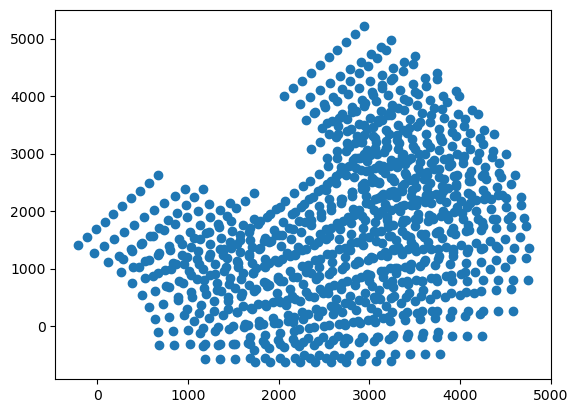

In [15]:
coordinates = zip(x, y)
plt.scatter(x, y)
plt.show()

In [16]:
import pandas as pd

df = pd.DataFrame(coordinates, columns=["X", "Y"])

In [17]:
j1Theta_prime_data = []
j2X_data = []
j3Theta_prime_data = []

# This is to create the unique set of combinations
theta_x_combinations = itertools.product(j1Theta_prime, j2X, j3Theta_prime)

for combination in theta_x_combinations:
    j1Theta_prime_data.append(combination[0])
    j2X_data.append(combination[1])
    j3Theta_prime_data.append(combination[2])

print(len(j1Theta_prime_data))

1000


In [18]:
print(len(j2X_data))

1000


In [19]:
print(j3Theta_prime_data)

[-2.3465902047863905, -2.0007568714530573, -1.654923538119724, -1.3090902047863908, -0.9632568714530576, -0.6174235381197242, -0.2715902047863912, 0.0742431285469427, 0.4200764618802757, 0.7659097952136094, -2.3465902047863905, -2.0007568714530573, -1.654923538119724, -1.3090902047863908, -0.9632568714530576, -0.6174235381197242, -0.2715902047863912, 0.0742431285469427, 0.4200764618802757, 0.7659097952136094, -2.3465902047863905, -2.0007568714530573, -1.654923538119724, -1.3090902047863908, -0.9632568714530576, -0.6174235381197242, -0.2715902047863912, 0.0742431285469427, 0.4200764618802757, 0.7659097952136094, -2.3465902047863905, -2.0007568714530573, -1.654923538119724, -1.3090902047863908, -0.9632568714530576, -0.6174235381197242, -0.2715902047863912, 0.0742431285469427, 0.4200764618802757, 0.7659097952136094, -2.3465902047863905, -2.0007568714530573, -1.654923538119724, -1.3090902047863908, -0.9632568714530576, -0.6174235381197242, -0.2715902047863912, 0.0742431285469427, 0.4200764

In [20]:
df["j1Angle"] = j1Theta_prime_data
df["j2X"] = j2X_data
df["j3Angle"] = j3Theta_prime_data

print(df)

               X            Y   j1Angle      j2X   j3Angle
0     685.934320  -325.275993  0.015202  2190.05 -2.346590
1    1185.844375  -571.851514  0.015202  2190.05 -2.000757
2    1739.740768  -634.368205  0.015202  2190.05 -1.654924
3    2282.034738  -505.423252  0.015202  2190.05 -1.309090
4    2748.511407  -200.285468  0.015202  2190.05 -0.963257
..           ...          ...       ...      ...       ...
995  3069.284610  3192.425299  0.940402  3690.05 -0.617424
996  3233.933997  3724.966499  0.940402  3690.05 -0.271590
997  3242.953498  4281.790668  0.940402  3690.05  0.074243
998  3185.914529  4796.962359  0.940402  3690.05  0.420076
999  2944.292125  5209.478335  0.940402  3690.05  0.765910

[1000 rows x 5 columns]


In [21]:
df.to_csv("/home/alexpc/dev_ws/src/pohm_robotics_arm/pohm_robotics_arm/data/data2.txt", sep="\t", header=False)

In [22]:
import sys

sys.path.insert(1, '/home/alexpc/dev_ws/src/pohm_robotics_arm/pohm_robotics_arm/anfis/')

import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy

In [23]:
# We will use the data to train the anfis
# The training data is in the form of input-output pair
# While it can have multiple input, it can only have a single output
ts = numpy.loadtxt("/home/alexpc/dev_ws/src/pohm_robotics_arm/pohm_robotics_arm/data/data2.txt", usecols=[1,2,3])#numpy.loadtxt('c:\\Python_fiddling\\myProject\\MF\\trainingSet.txt',usecols=[1,2,3])

# Now we need to normalize the input value
# In another word, we are converting the crisp value to the fuzzy value
X = ts[:,0:2]
x0max = np.max(X[:, 0])
x1max = np.max(X[:, 1])
x0min = np.min(X[:, 0])
x1min = np.min(X[:, 1])
X[:, 0] = ((X[:, 0] - x0min) / (x0max - x0min)) * 20.0 -10.0
X[:, 1] = ((X[:, 1] - x1min) / (x1max - x1min)) * 20.0 -10.0

Y = ts[:,2]

In [24]:
mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]


mfc = membership.membershipfunction.MemFuncs(mf)
anf = anfis.ANFIS(X, Y, mfc)

current error: 16.718035619699705
2
current error: 16.716838328887505
3
current error: 16.71562058406974
4
current error: 16.714386469332986
5
current error: 16.713016554741337
6
current error: 16.711649697299322
7
current error: 16.71028982590997
8
current error: 16.70894005286187
9
current error: 16.70760291092893
10
current error: 16.706280714469976
11
current error: 16.704976008246888
12
current error: 16.703692063709386
13
current error: 16.702433390149917
14
current error: 16.701206246852376
15
current error: 16.700019170209252
16
current error: 16.698883568614335
17
current error: 16.697814494199697
18
current error: 16.696831797128983
19
current error: 16.69596206412994
20
current error: 16.695242203157207
21
current error: 16.69472678054838
22
current error: 16.694505206564422
23
current error: 16.694751173361
24
current error: 16.69594336176055
25
current error: 16.70104168912254
26
current error: 16.707473602849145
27
current error: 16.710226576549026
28
current error: 16.71

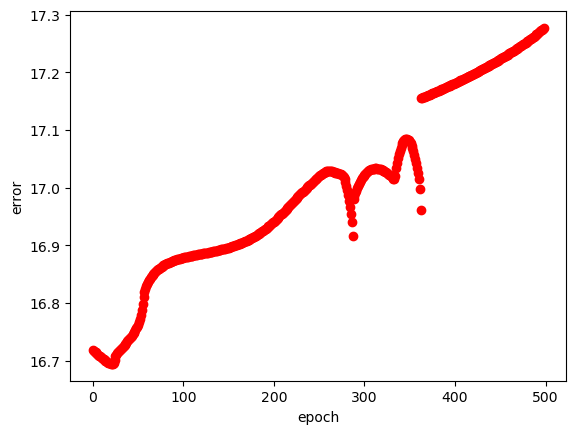

Plotting results


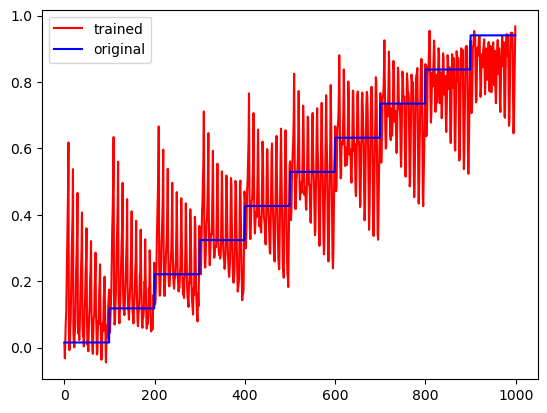

In [25]:
anf.trainHybridJangOffLine(epochs=500)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

In [26]:
import numpy as np
x_in = ((3249 - x0min) / (x0max - x0min)) * 20.0 - 10.0
y_in = ((775 - x1min) / (x1max - x1min)) * 20.0 - 10.0
cincai = anfis.predict(anf, np.array([[x_in, y_in]]))
print(cincai)

[[0.31125542]]


In [49]:
print(anf.fittedValues)

[[-2.21641791e-03]
 [ 1.89221779e-03]
 [ 4.42816107e-04]
 [ 4.56158507e-04]
 [ 9.63601719e-04]
 [-5.22001863e-04]
 [-5.02515470e-04]
 [ 1.77938529e-04]
 [ 3.81690950e-03]
 [ 1.15304603e-03]
 [ 9.71672318e-02]
 [ 1.00177224e-01]
 [ 9.54890704e-02]
 [ 9.67975913e-02]
 [ 9.46958932e-02]
 [ 9.63222739e-02]
 [ 9.76078718e-02]
 [ 9.61946781e-02]
 [ 9.80157052e-02]
 [ 9.47443807e-02]
 [ 1.93157655e-01]
 [ 1.96050584e-01]
 [ 1.92449374e-01]
 [ 1.93480339e-01]
 [ 1.92773701e-01]
 [ 1.94209094e-01]
 [ 1.95705285e-01]
 [ 1.92110217e-01]
 [ 1.92933924e-01]
 [ 1.90479393e-01]
 [ 2.89911513e-01]
 [ 2.92169775e-01]
 [ 2.89430008e-01]
 [ 2.91220866e-01]
 [ 2.91071402e-01]
 [ 2.89463601e-01]
 [ 2.92880545e-01]
 [ 2.88686038e-01]
 [ 2.89633349e-01]
 [ 2.88378741e-01]
 [ 3.87033357e-01]
 [ 3.88495763e-01]
 [ 3.86248341e-01]
 [ 3.88290696e-01]
 [ 3.87425332e-01]
 [ 3.88439477e-01]
 [ 3.88577604e-01]
 [ 3.85856119e-01]
 [ 3.88364760e-01]
 [ 3.87708266e-01]
 [ 4.84605044e-01]
 [ 4.85313012e-01]
 [ 4.8352061

current error: 0.0004160115304810712
2
current error: 0.0004363942302046059
3
current error: 0.00045413192024614104
4
current error: 0.00047226537473393966
5
current error: 0.0004938639053642197
6
current error: 0.0005329708848708139
7
current error: 0.0005747744220674342
8
current error: 0.0005872602647634715
9
current error: 0.0005979127813461518
10
current error: 0.0006074857303029481
11
current error: 0.0006163271149462322
12
current error: 0.0006246370417875564
13
current error: 0.0006325473996683259
14
current error: 0.0006401541932589355
15
current error: 0.0006475329800546716
16
current error: 0.0006547470985281364
17
current error: 0.0006618523868037362
18
current error: 0.0006688999121190005
19
current error: 0.0006759370911270841
20
current error: 0.0006830059620901097
21
current error: 0.000690130382086624
22
current error: 0.000697225586537635
23
current error: 0.0007024470050416265
24
current error: 0.0006931899491092391
25
current error: 0.0006894437306839032
26
current 

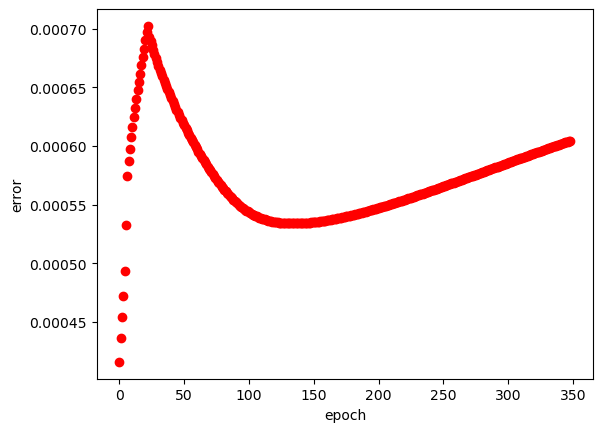

Plotting results


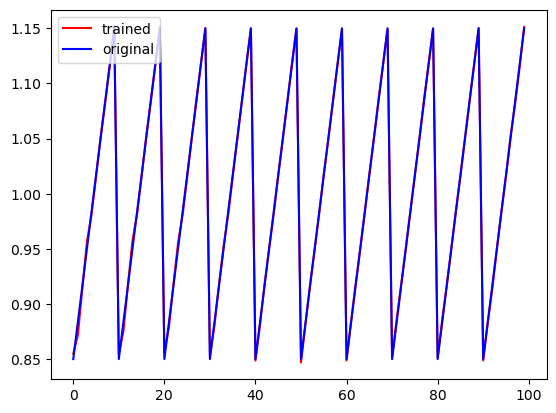

In [50]:
ts = numpy.loadtxt("/home/alexpc/dev_ws/src/pohm_robotics_arm/pohm_robotics_arm/data/data2.txt", usecols=[1,2,4])#numpy.loadtxt('c:\\Python_fiddling\\myProject\\MF\\trainingSet.txt',usecols=[1,2,3])
Y = ts[:,2]

j2Anf = anfis.ANFIS(X, Y, mfc)
j2Anf.trainHybridJangOffLine(epochs=350)
print(round(j2Anf.consequents[-1][0],6))
print(round(j2Anf.consequents[-2][0],6))
print(round(j2Anf.fittedValues[9][0],6))
if round(j2Anf.consequents[-1][0],6) == -5.275538 and round(j2Anf.consequents[-2][0],6) == -1.990703 and round(j2Anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')

print("Plotting errors")
j2Anf.plotErrors()
print("Plotting results")
j2Anf.plotResults()

In [54]:
print(x0min, x0max, x1min, x1max)

0.5142256135974703 1.2250510256874831 0.6183542342021656 1.7291516460872707


In [55]:
x_in = ((0.98 - x0min) / (x0max - x0min)) * 20.0 - 10.0
y_in = ((1.42 - x1min) / (x1max - x1min)) * 20.0 - 10.0
cincai = anfis.predict(anf, np.array([[x_in, y_in]]))
cincai1 = anfis.predict(j2Anf, np.array([[x_in, y_in]]))
print(cincai[0][0], cincai1[0][0])

0.8666041491448354 1.053293742666749


In [56]:
import pickle

# Store the person data using Pickle
with open("/home/alexpc/dev_ws/src/pohm_robotics_arm/pohm_robotics_arm/data/j1Anf.pickle", "wb") as file:
    pickle.dump(anf, file)

In [57]:
# Store the person data using Pickle
with open("/home/alexpc/dev_ws/src/pohm_robotics_arm/pohm_robotics_arm/data/j2Anf.pickle", "wb") as file:
    pickle.dump(j2Anf, file)

In [58]:
with open("/home/alexpc/dev_ws/src/pohm_robotics_arm/pohm_robotics_arm/data/j1Anf.pickle", "rb") as file:
    anf_new = pickle.load(file)

x_test = ((0.83 - x0min) / (x0max - x0min)) * 20.0 - 10.0
y_test = ((1.61 - x1min) / (x1max - x1min)) * 20.0 - 10.0

j1Angle_test = anfis.predict(anf_new, np.array([[x_test, y_test]]))
print(j1Angle_test)

[[0.87353818]]
